# **HSDC Stage-E**

# DATA CURATION FOR STORYTELLING 
*by Sakshi Jha*


**Aim of the project:**
To curate and visualize the frequently brought books on amazon between 2009 to 2019, gather insights and pattern and construct a story on the popular books on Amazon.

About the dataset:
Data is scraped from amazon website and saved in file 'Bestseller with categories.csv'.

This dataset contains information about top selling books of Amazon(550 books) either belonging to fiction or non-fiction.


In [3]:
# Importing libraries
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

# For Special Visualizations
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

# **Data prepration and cleaning**

In [7]:
df=pd.read_csv("/content/drive/MyDrive/bestsellers with categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.isnull().sum()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [10]:
#There are 550 number of records in the dataset
df.shape

(550, 7)

In [11]:
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


In [12]:
### to get an overview of the dataframe
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


It can be observed from the above table that maximum price of a book is 105$ and maximum rating is 4.9.

In [13]:
#there are 351 number of unique books(with or without sub categories or serial release)
len(df.Name.value_counts())

351

Total number of unique books are 351 but total rows are 550.

This is clear, if we see the dataframe that some books are repeatedly among the top sellers in different years.

# Adding an "Estimated profit" column
To provide us breafings for total earning made by the books.

In [18]:
df['estimated_profit'] = df.Reviews*df.Price
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,estimated_profit
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,138800
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,45144
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,284685
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,128544
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,91980


# EXPLORATORY DATA ANALYSIS

Lets explore some following aspects:


*   Average rating of each genre and most sold genre
*   Most popular genre.
*   Which genre has the most books in this category.
*  Books that have earned the most money in each genre.
* Popularity of each genre and its relationship with time.
* Which year had the most books sold in this category?
*  Impact on price of book in respect to time.
* Relationship of selling with ratings.
* Most popular author to each genre.
* The money making books overall.






In [22]:
#To rename the columns and make it easy to use:
df.columns=['name','author','user_rating','reviews','price','year','genre', 'estimated_profit']

# Average rating of each genre and most sold genre


In [23]:
#Average ratings
df.groupby('genre')['user_rating'].mean()

genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

Fiction books have average ratings of 4.6 while Non-fiction have average rating of 4.5.

In [31]:
fiction_df_values=df[df.genre=='Fiction']
len(fiction_df_values)

240

In [32]:
Nfiction_df=df[df.genre=='Non Fiction']
len(Nfiction_df)

310

In [33]:
genre_dist=df.genre.value_counts()
genre_dist

Non Fiction    310
Fiction        240
Name: genre, dtype: int64

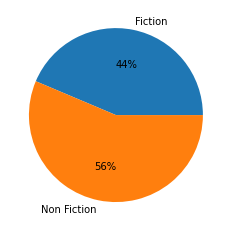

In [34]:
plt.pie([240,310],labels=['Fiction','Non Fiction'],autopct='%.0f%%');

Hence, Non- fiction books are in top selling categories.

# User Ratings Overview:

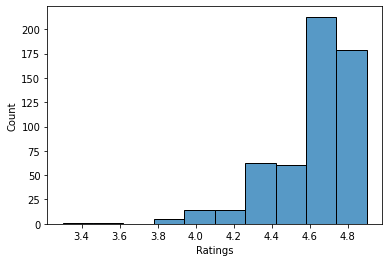

In [35]:
#Distribution of ratings
sns.histplot(data=df.user_rating,bins=10)
plt.xlabel("Ratings");

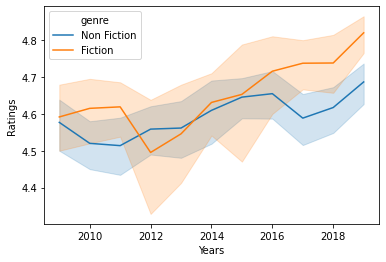

In [36]:
# Relationship of ratings with time.
sns.lineplot(y=df.user_rating,x=df.year,hue=df.genre);
plt.ylabel("Ratings")
plt.xlabel("Years");

so, from the above graph that most of the books received ratings between 4.5 to 4.9.

# Relationship between ratings and price

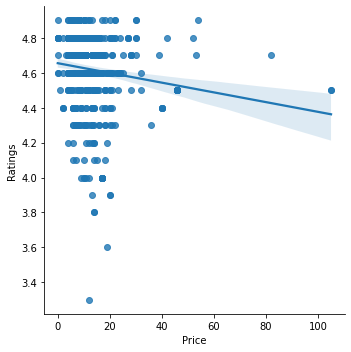

In [37]:
sns.lmplot(y='user_rating',x='price',data=df)
plt.ylabel('Ratings')
plt.xlabel('Price');

This graph shows that there is not a significant relationship between price and ratings but with increasing price , the ratings are falling for both Fiction and Non fiction.
User ratings and prices have inverse relations, most probably.

# Book earnings; yearly and based on genre

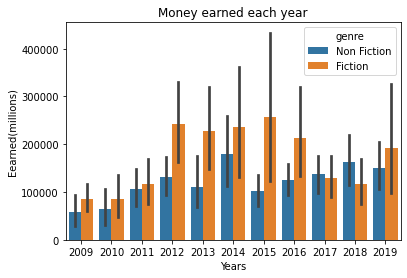

In [38]:
sns.barplot(x=df.year,y=df.estimated_profit,hue=df.genre)
plt.xlabel('Years')
plt.ylabel("Eearned(millions)")
plt.title('Money earned each year');

Above graph above shows the earning of these top books ,in most cases, are below 0.8 million

In [40]:
#Average Profit earned by each book depending on its genre
genre_average=df.groupby(['genre'])['estimated_profit'].mean()

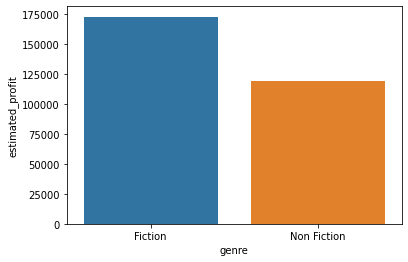

In [41]:
sns.barplot(x=genre_average.index,y=genre_average);

# TOP 10 Books which earned the most

In [42]:
rich_df=df.groupby('name')['estimated_profit'].max()
rich_df=rich_df.sort_values(ascending=False).head(10)
rich_df

name
The Girl on the Train                                                                                 1430028
The Alchemist                                                                                         1396161
Where the Crawdads Sing                                                                               1317615
Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5                              701295
Harry Potter Paperback Box Set (Books 1-7)                                                             700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                                    676880
Becoming                                                                                               672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)               661710
The Fault in Our Stars                                                                                 656266
A Gam

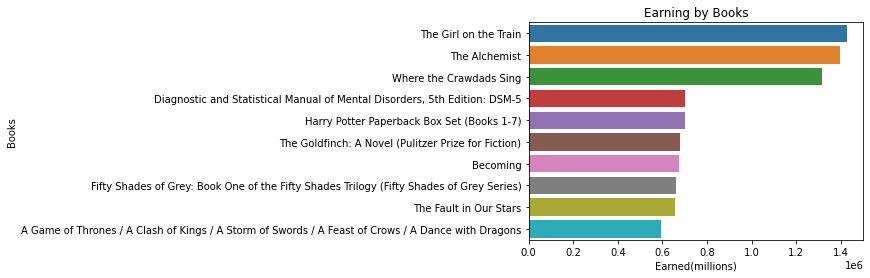

In [43]:
sns.barplot(x=rich_df,y=rich_df.index)
plt.xlabel("Earned(millions)")
plt.ylabel("Books")
plt.title('Earning by Books');

# Books which earned the most per year (2009-19)

In [44]:
most_earning_book_per_year=df[df.groupby('year')['estimated_profit'].transform(max) == df['estimated_profit']]
most_earning_book_per_year

,name,author,user_rating,reviews,price,year,genre,estimated_profit
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction,661710
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
265,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,458730
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction,394680
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction,508470
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction,474768


In [51]:
most_earning_book_per_year

,name,author,user_rating,reviews,price,genre,estimated_profit
year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


In [52]:
genres_per_year_mean=df.groupby(['year','genre'])['estimated_profit'].mean().round(2)

# Yearly sales of each genre (2009 - 2019)

In [53]:
pd.DataFrame(genres_per_year_mean)

estimated_profit
year genre                        
2009 Fiction              85776.79
     Non Fiction          58024.58
2010 Fiction              84522.00
     Non Fiction          64335.63
2011 Fiction             117434.67
     Non Fiction         106295.21
2012 Fiction             242780.67
     Non Fiction         132104.31
2013 Fiction             226853.71
     Non Fiction         110657.31
2014 Fiction             236487.86
     Non Fiction         179397.71
2015 Fiction             256752.82
     Non Fiction         102435.36
2016 Fiction             213931.84
     Non Fiction         125381.45
2017 Fiction             129188.17
     Non Fiction         137256.88
2018 Fiction             117636.00
     Non Fiction         162524.79
2019 Fiction             191812.50
     Non Fiction         150023.50

# Sales trends over the years

In [54]:
Earning_Graph=df.groupby('year')['estimated_profit'].sum()

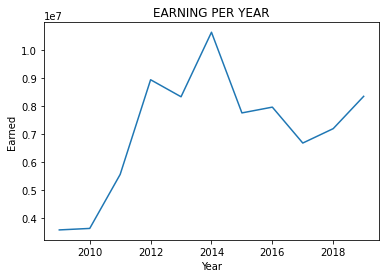

<Figure size 864x864 with 0 Axes>

In [55]:
sns.lineplot(data=Earning_Graph)
plt.xlabel('Year')
plt.ylabel("Earned")
plt.title("EARNING PER YEAR")
plt.figure(figsize=(12,12));

Most sales were observed in 2014

# The money makers

In [56]:
authors=df.groupby('author')['estimated_profit'].sum()

In [57]:
# Authors that earned most profit
authors=authors.sort_values(ascending=False).head(10)
authors

author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Name: estimated_profit, dtype: int64

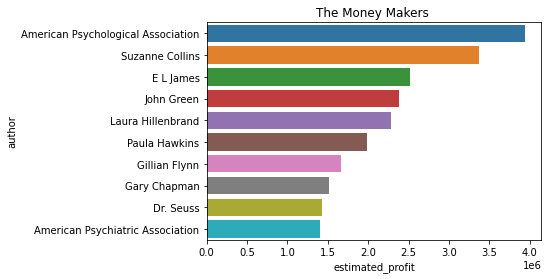

In [58]:
sns.barplot(y=authors.index,x=authors)
plt.title('The Money Makers ');

# Best sellers

In [61]:
x=df[df["user_rating"]==4.9]
x.head(10)

,name,author,user_rating,reviews,price,year,genre,estimated_profit
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction,71720
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,71720
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction,30372
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction,38288
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction,28940
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,28940
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction,100952
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction,72712
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction,32820
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction,49266


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 146 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 146 missing from current font.



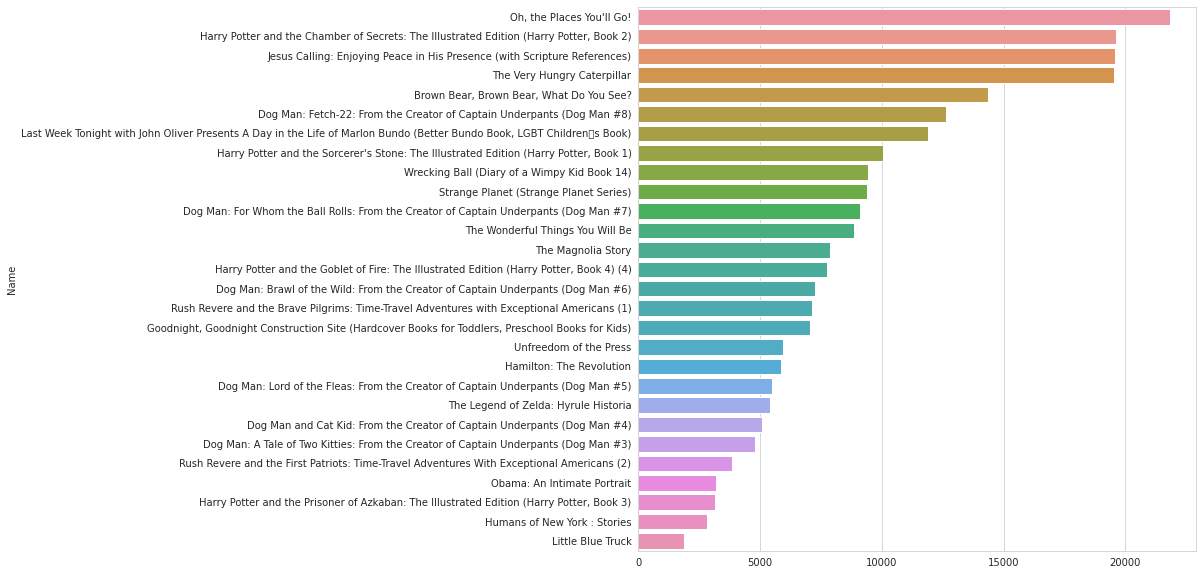

In [ ]:
y= x.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)

In [63]:
df['author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: author, Length: 248, dtype: int64

In [64]:
#BESTSELLING BOOKS' AUTHORS:
temp_df1 = df.groupby('author').count().reset_index().sort_values('name',ascending=False).head(10)

In [65]:
top = go.Bar(
                x = temp_df1['author'],
                y = temp_df1['name'],
                marker = dict(color = 'cyan',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_white",title = 'Top 10 Best-Selling Authors ' , 
                   xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'count'))
fig = go.Figure(data = [top], layout = layout)
fig.show()

In [ ]:
# top sellers in fiction
Fiction = df[df["Genre"]=='Fiction']
Fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction


In [ ]:
# top sellers in non-fiction
Non_Fiction = df[df["Genre"]=='Non Fiction']
Non_Fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction


# **Word cloud**

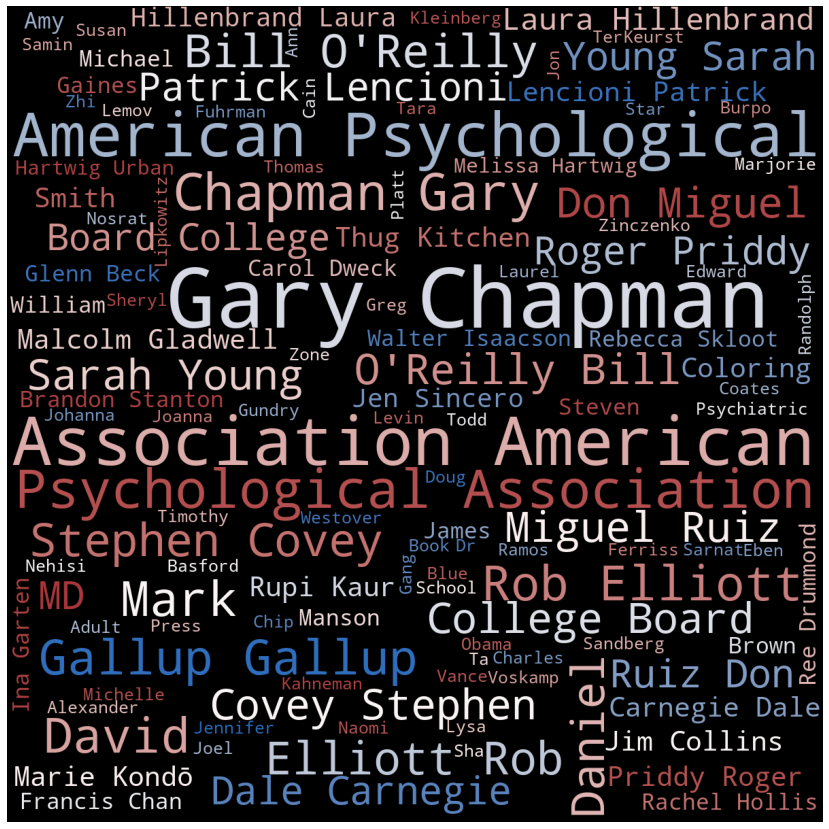

In [ ]:
from wordcloud import WordCloud

text=' '.join(Non_Fiction['author'])

plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='black', colormap='vlag', 
                    width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()